# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [ ]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

In [5]:
coef

array([ 38.07925837,   0.        ])

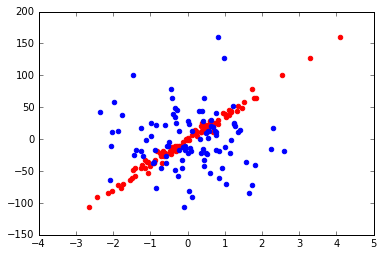

In [6]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [21]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [22]:
print test_labels

[ -48.28700118   24.82763821   22.13032804   64.70214251   12.47089016
  -16.30914909   12.67156468   78.24817537  -10.06708677   25.24428409
   13.31981235  -10.29545833  -40.84204295   49.41686419   28.15553021
  -22.33224966   14.76930132   -1.42235396  -32.71074998  -70.11132234
  -24.77820218   64.19559505  126.64909941   20.87713077   51.87072011
   13.02656201  -22.32195021   11.06961035   39.70663436  -11.18242389]


In [23]:
print predictions

[ -56.94024535   30.00355334   19.90079271   68.25772077   19.38117552
  -12.93285172   13.79805112   66.29834441   -9.75040869   14.41340947
   13.88111475  -11.54117144  -47.91407347   55.72876402   22.33229249
  -29.71534912    7.05998913   -1.56316705  -44.55963436  -67.86595845
  -27.06195515   69.93877128  125.67172192   13.00636439   51.91261898
   18.34181804  -23.72825931   25.86657893   37.70214692  -13.42778533]


In [24]:
metrics.mean_absolute_error(test_labels, predictions)

4.9050578948222627

In [25]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [26]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [27]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [15]:
coef

array([ 38.07925837,   0.        ])

In [16]:
linear_regressor.coef_

array([  3.85714783e+01,   3.73811709e-02])

In [17]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [18]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1])

y = 38.57*x1 + 0.04*x2


#### Lasso

In [28]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [29]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [30]:
print lasso_regressor.coef_

[ 37.77288403  -0.        ]


In [31]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [32]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.77*x1 + -0.00*x2
